In [9]:
import MDAnalysis
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align
ref = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.gro')
trj = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.gro',
                          '/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.trr')
alignment = align.AlignTraj(trj, ref, select="protein and name CA")
alignment.run()


In [51]:
#alignment

ref_40 = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step8_anneal40.gro')
trj_40 = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.gro',
                             '/home/knyazeva/bR/Structures/charmm-gui/gromacs/step8_anneal40.trr')
alignment = align.AlignTraj(trj_40, ref_40, select="protein and name CA")
alignment.run()

ref_50 = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step8_anneal50.gro')
trj_50 = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.gro',
                             '/home/knyazeva/bR/Structures/charmm-gui/gromacs/step8_anneal50.trr')
alignment = align.AlignTraj(trj_50, ref_50, select="protein and name CA")
alignment.run()

ref_60 = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step8_anneal60.gro')
trj_60 = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.gro',
                             '/home/knyazeva/bR/Structures/charmm-gui/gromacs/step8_anneal60.trr')
alignment = align.AlignTraj(trj_60, ref_60, select="protein and name CA")
alignment.run()

In [19]:
for ts in trj.trajectory:
    zch = trj.select_atoms("protein and (resid 96 or resid 204 or resid 194)").positions
    C = trj.select_atoms("protein").center_of_geometry()
    Zh=max(np.array(zch[0:,2:]))-C-3
    Zl=min(np.array(zch[0:,2:]))-C-3

zh=np.average(Zh)
zl=np.average(Zl)
water=trj.select_atoms("protein or (resname TIP3 and cyzone 11.0 %f %f protein)"%(zh,zl))
water.write("water.gro")


In [52]:
from MDAnalysis.analysis.waterdynamics import MeanSquareDisplacement as MSD

for ts in trj.trajectory:
    zch = trj.select_atoms("protein and (resid 96 or resid 204 or resid 194)").positions
    C = trj.select_atoms("protein").center_of_geometry()
    Zh=max(np.array(zch[0:,2:]))-C-3
    Zl=min(np.array(zch[0:,2:]))-C-3

zh=np.average(Zh)
zl=np.average(Zl)

selection = "resname TIP3 and cyzone 11.0 %f %f protein"%(zh,zl)
MSD_analysis = MSD(trj, selection, 0, 100, 20)
MSD_analysis.run()
#now we print data ready to graph. The graph
#represents MSD vs t
time = 0
for msd in MSD_analysis.timeseries:
      print("{time} {msd}".format(time=time, msd=msd))
      time += 1

Step  2001/2001 [100.0%]


0 5.317154778613408
1 8.025659922618612
2 10.275088496066047
3 11.800642436938938
4 11.648547367551508
5 15.752628710005354
6 17.7248801158387
7 15.0872605220453
8 16.322740056463335
9 16.314349957099306
10 19.36642550378955
11 17.604684238114935
12 19.36531952375554
13 28.957208914229895
14 27.310748942309903
15 25.0504074524833
16 28.983814346376395
17 26.475692454878335
18 26.906881470126763
19 25.48806579805384


In [53]:
for ts in trj_40.trajectory:
    zch = trj_40.select_atoms("protein and (resid 96 or resid 204 or resid 194)").positions
    C = trj_40.select_atoms("protein").center_of_geometry()
    Zh=max(np.array(zch[0:,2:]))-C-3
    Zl=min(np.array(zch[0:,2:]))-C-3

zh=np.average(Zh)
zl=np.average(Zl)

selection = "resname TIP3 and cyzone 11.0 %f %f protein"%(zh,zl)
MSD_analysis_40 = MSD(trj_40, selection, 0, 100, 20)
MSD_analysis_40.run()
time = 0
for msd in MSD_analysis_40.timeseries:
      print("{time} {msd}".format(time=time, msd=msd))
      time += 1

Step  2001/2001 [100.0%]


0 5.502135038235087
1 8.334754844451991
2 10.09169088377052
3 11.91412524903589
4 13.041408480346451
5 13.204210815391724
6 16.16292941611359
7 14.28528976852284
8 14.821257552371225
9 17.36435962921739
10 17.5422830321996
11 15.750821918281181
12 15.313370081782343
13 19.98116404413503
14 13.103870319234474
15 15.6280921970985
16 16.310993922573914
17 16.930552010165734
18 14.295022809229392
19 16.274889239077904


In [54]:
for ts in trj_50.trajectory:
    zch = trj_50.select_atoms("protein and (resid 96 or resid 204 or resid 194)").positions
    C = trj_50.select_atoms("protein").center_of_geometry()
    Zh=max(np.array(zch[0:,2:]))-C-3
    Zl=min(np.array(zch[0:,2:]))-C-3

zh=np.average(Zh)
zl=np.average(Zl)

selection = "resname TIP3 and cyzone 11.0 %f %f protein"%(zh,zl)
MSD_analysis_50 = MSD(trj_50, selection, 0, 100, 20)
MSD_analysis_50.run()
time = 0
for msd in MSD_analysis_50.timeseries:
      print("{time} {msd}".format(time=time, msd=msd))
      time += 1

Step  2001/2001 [100.0%]


0 5.079713387178595
1 7.641810497402032
2 8.234219275307195
3 9.223348694736043
4 11.639200053684993
5 11.529511362721221
6 11.09598311902898
7 10.451240214202143
8 14.181834096485526
9 15.417244846035349
10 15.694758122593415
11 16.617661911602926
12 14.700868485503127
13 11.705232724763897
14 18.558998234535093
15 11.860479391693296
16 17.246529374863854
17 15.354996509154091
18 14.97646707294154
19 17.88466467687617


In [55]:
for ts in trj_60.trajectory:
    zch = trj_60.select_atoms("protein and (resid 96 or resid 204 or resid 194)").positions
    C = trj_60.select_atoms("protein").center_of_geometry()
    Zh=max(np.array(zch[0:,2:]))-C-3
    Zl=min(np.array(zch[0:,2:]))-C-3

zh=np.average(Zh)
zl=np.average(Zl)

selection = "resname TIP3 and cyzone 11.0 %f %f protein"%(zh,zl)
MSD_analysis_60 = MSD(trj_60, selection, 0, 100, 20)
MSD_analysis_60.run()
time = 0
for msd in MSD_analysis_60.timeseries:
      print("{time} {msd}".format(time=time, msd=msd))
      time += 1

Step  2001/2001 [100.0%]


0 3.711620789260939
1 4.779327555021486
2 6.212372873404565
3 7.656724037334967
4 7.427813138723904
5 8.119592838159038
6 10.966257821594342
7 9.550089409277122
8 12.672098486497248
9 12.514268915700976
10 10.787204913769594
11 16.240054468206342
12 16.182360756103204
13 17.192303835034924
14 13.064104318158192
15 12.606516525745391
16 13.445972682809401
17 10.481453658108201
18 12.937181087210774
19 15.821209492782751


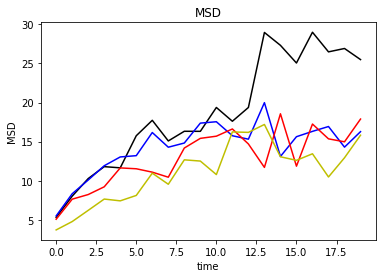

<Figure size 432x288 with 0 Axes>

In [56]:
#Plot
plt.xlabel('time')
plt.ylabel('MSD')
plt.title('MSD')
plt.plot(range(0,time),MSD_analysis.timeseries, 'k')
plt.plot(range(0,time),MSD_analysis_40.timeseries, 'b')
plt.plot(range(0,time),MSD_analysis_50.timeseries, 'r')
plt.plot(range(0,time),MSD_analysis_60.timeseries, 'y')
plt.show()
plt.savefig("MSD.pdf")

In [ ]:
from MDAnalysis.analysis.waterdynamics import SurvivalProbability as SP

selection = " resname TIP3 and sphzone 5 (resid 96 or resid 216 or resid 85 or resid 82 or resid 204 or resid 194) "
SP_analysis = SP(trj, selection, 0, 2000, 20)
SP_analysis.run()
#now we print data ready to graph. The graph
#represents SP vs t
time = 0
for sp in SP_analysis.timeseries:
      print("{time} {sp}".format(time=time, sp=sp))
      time += 1

#Plot
plt.xlabel('time')
plt.ylabel('SP')
plt.title('Survival Probability')
plt.plot(range(0,time),MSD_analysis.timeseries)
plt.show()